In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import psutil
import numpy as np

In [2]:
df = pd.read_csv("/home/tylern/data/stats.csv", parse_dates=[0], index_col='datetime')
df.head()

,pid,name,num_threads,cpu_percent,cpu_t_user,cpu_t_system,cpu_num,mem_rss,mem_vms,mem_shared,mem_percentage,num_fds,read_count,write_count,read_chars,write_chars
datetime,,,,,,,,,,,,,,,,
2021-11-22 18:12:14.058198,1,systemd,1,0.0,660.16,320.21,7,11493376,174059520,NaN,0.068884,None,NaN,NaN,NaN,NaN
2021-11-22 18:12:14.058807,2,kthreadd,1,0.0,0.00,395.91,0,0,0,NaN,0.000000,None,NaN,NaN,NaN,NaN
2021-11-22 18:12:14.059385,3,rcu_gp,1,0.0,0.00,0.00,0,0,0,NaN,0.000000,None,NaN,NaN,NaN,NaN
2021-11-22 18:12:14.059945,4,rcu_par_gp,1,0.0,0.00,0.00,0,0,0,NaN,0.000000,None,NaN,NaN,NaN,NaN
2021-11-22 18:12:14.060537,6,kworker/0:0H-events_highpri,1,0.0,0.00,0.00,0,0,0,NaN,0.000000,None,NaN,NaN,NaN,NaN


In [3]:
unique_pids = df.pid.unique()

#create a data frame dictionary to store your data frames
df_dict = {p : pd.DataFrame for p in unique_pids}

for key in df_dict.keys():
    df_dict[key] = df[:][df.pid == key]

# print(unique_pids)

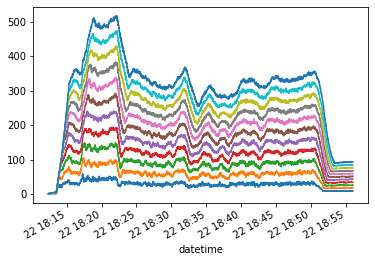

In [20]:
for k,v in df_dict.items():
    if np.any(v.name.str.contains("csv")):
        cpu_percent = (v.cpu_t_user + v.cpu_t_system).rolling(f'10s').apply(lambda x: x.iloc[-1] - x.iloc[0])
        cpu_percent.plot()
    plt.show()